# IGN Reviews - 10/10 Statistical Analysis

#### Sometimes during the weekends I like to do little fun projects. Beeing a huge video games fan, I think this is going to be a very interesting one. So this is a statistical analysis of over 18 thousand IGN reviews made in the last 50 years. 

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("hls", 4))

import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

ign.csv



In [2]:
df = pd.read_csv('../input/ign.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

It looks like the Unnamed: 0 column can be safely dropped, let's also drop the url column, since it doesn't add much to our analysis.

In [4]:
df.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11


Now let's check which values are present in the score_phrase column, and let's start preparing it to plot in a histogram

In [5]:
df['score_phrase'].value_counts()

Great          4765
Good           4725
Okay           2940
Mediocre       1957
Amazing        1803
Bad            1268
Awful           662
Painful         339
Unbearable       72
Masterpiece      55
Disaster          3
Name: score_phrase, dtype: int64

Hmm, interesting, there seems to be way more positive reviews than negative ones, let's investigate this further. We can make a list with all this values to use it in our graph.

In [6]:
scores = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', 'Bad', 'Awful',
         'Painful', 'Unbearable', 'Disaster']
scores_values = list(reversed(range(0, 11)))

# Reviews Distribution

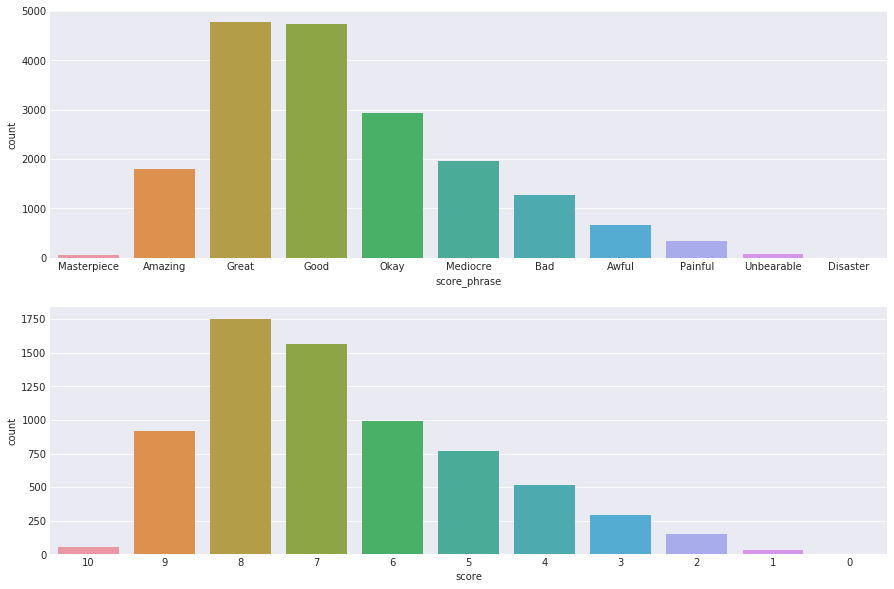

In [7]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(15, 10))
plt.figure(figsize=(15, 5))
sns.countplot(df['score_phrase'], order=scores, ax=axis1)
sns.countplot(df['score'], order=list(reversed(range(0, 11))), ax=axis2)

As we can see in the graphs above, the reviews distribution is definetely more skewed towards the positive side, with a big concentration of reviews around the 'Great' and 'Good', with scores of 8 and 7. 

# Cleaning Some Data

Let's take a look at all the values present in the 'genre' column.

In [8]:
df['genre'].unique()

array(['Platformer', 'Puzzle', 'Sports', 'Strategy', 'Fighting', 'RPG',
       'Action, Adventure', 'Adventure', 'Action', 'Action, RPG',
       'Shooter', 'Music', 'Board', 'Racing', 'Strategy, RPG',
       'Racing, Action', 'Shooter, RPG', 'Simulation',
       'Action, Simulation', 'Flight, Action', 'Puzzle, Action',
       'Action, Compilation', 'Educational, Puzzle', 'Wrestling',
       'Fighting, Action', 'Productivity', 'Sports, Simulation',
       'Music, Action', 'Sports, Action', 'Party', 'Battle',
       'Puzzle, Adventure', 'Puzzle, Word Game', 'Card, Battle',
       'Simulation, Adventure', 'Compilation', 'Flight', 'Pinball',
       'Hunting', 'Casino', 'Sports, Racing', 'Fighting, Compilation',
       'Flight, Simulation', 'Trivia', 'Action, Platformer', 'Other',
       'Virtual Pet', 'Music, Editor', 'Sports, Editor',
       'Racing, Simulation', 'RPG, Editor', 'Educational, Action', 'Card',
       'Card, RPG', 'Wrestling, Simulation', 'Fighting, Adventure',
       'Sport

Well... that looks bad... There are a lot of genres that seem to have 2 keywords, like 'Puzzle, Platformer' eventhough there is already both genres separated. We can fix this with a few lambda functions to get rid of the second part in this genres and format it. Also, for some reason, 'Baseball' is a separated genre from 'Sports', let's fix them by putting Baseball into the sports category.

In [9]:
df['genre'] = df['genre'].apply(lambda x: str(x).split(',')[0])
df['genre'] = df['genre'].apply(lambda x: 'Sports' if x == 'Baseball' else x)

Great! Now let's plot and see if we find out anything interesting.

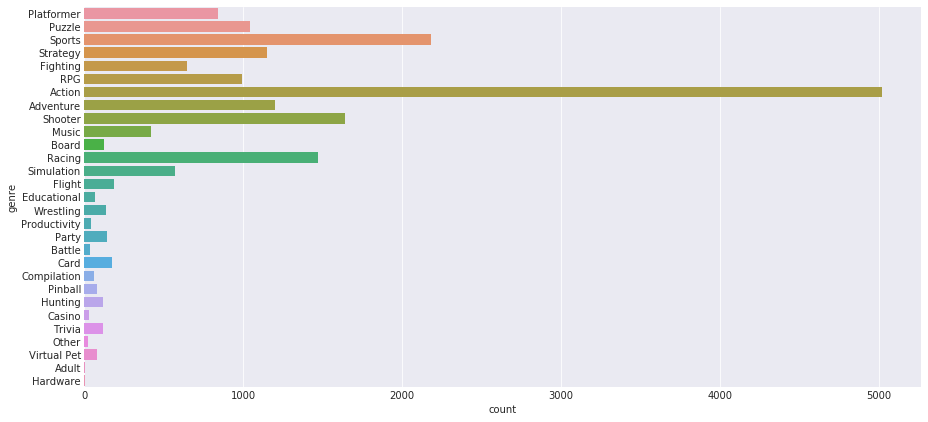

In [10]:
plt.figure(figsize=(15, 7))
sns.countplot(y=df['genre'])

WOW! There seems to be A LOT more games in the 'Action' category (more than double) than any other one. The second most popular category is Sports, followed by Shooter, which I argue, could be included in the Action group, then the next most popular genre would be Racing, which again, I think could be included in the Sports category. Then the next most popular group would be Adventure. I think it's interesting that there are more Racing then Adventure games released.

## Titles WordCloud

Let's take a look at a word cloud of the most common words used in titles of video games releases in the last 30 years.

(-0.5, 1279.5, 719.5, -0.5)

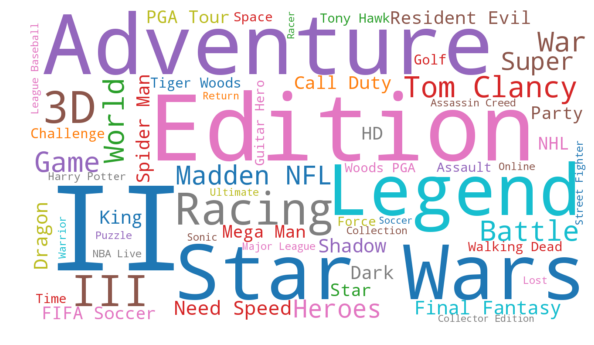

In [11]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                      width=1280,height=720, max_words=60,
                      prefer_horizontal=0.85, colormap='tab10').generate(" ".join(df['title']))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Interesting to see that there are more Star Wars titles than Call of Duty. I'd never guessed that. Also, it's funny how some TV shows, like Walking Dead and movies like Harry Potter show in the cloud. Another interesting thing is that Tiger Woods also makes an appearance.

# Most Popular Platforms

Now let's take a look at the most popular platforms by titles released.

In [12]:
df['platform'].value_counts()

PC                      3367
PlayStation 2           1684
Xbox 360                1631
Wii                     1362
PlayStation 3           1355
Nintendo DS             1044
PlayStation              952
Wireless                 906
iPhone                   828
Xbox                     821
PlayStation Portable     632
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             252
Nintendo 3DS             222
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

In [13]:
platforms = ['PC', 'PlayStation 2', 'Xbox 360', 'Wii', 'PlayStation 3', 'Nintendo DS',
             'PlayStation', 'Wireless', 'iPhone', 'Xbox', 'PlayStation Portable',
            'Game Boy Advance', 'GameCube', 'Game Boy Color', 'Nintendo 64', 'Dreamcast', 
            'PlayStation 4', 'Nintendo DSi', 'Nintendo 3DS', 'Xbox One', 'PlayStation Vita',
            'Wii U']

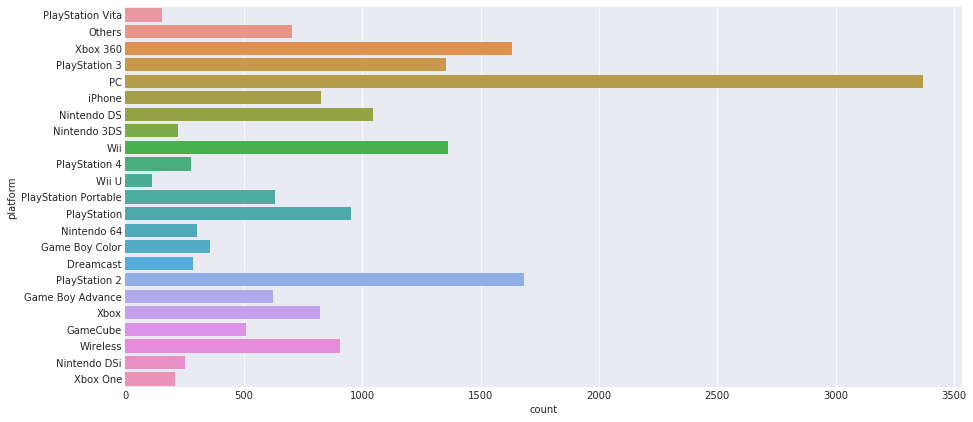

In [14]:
df['platform'] = df['platform'].apply(lambda x: 'Others' if x not in platforms else x)
plt.figure(figsize=(15, 7))
sns.countplot(y=df['platform'])

We can see that the platform with the most releases is PC, that makes sense, since computer's don't really have a life spam, they get upgraded, but stay categorized as PC. The second and third platforms with the most releases are XBOX 360 and Playstation 2.  Followed by the Playstation 3 and Wii.

# Game Releases by Date

Let's take a look at the graphs for games released by day, month and year. From my gamer experience I feel that the hottest months for releases are around september/october. Let's see if that's how it goes and if there is some other interesting information.

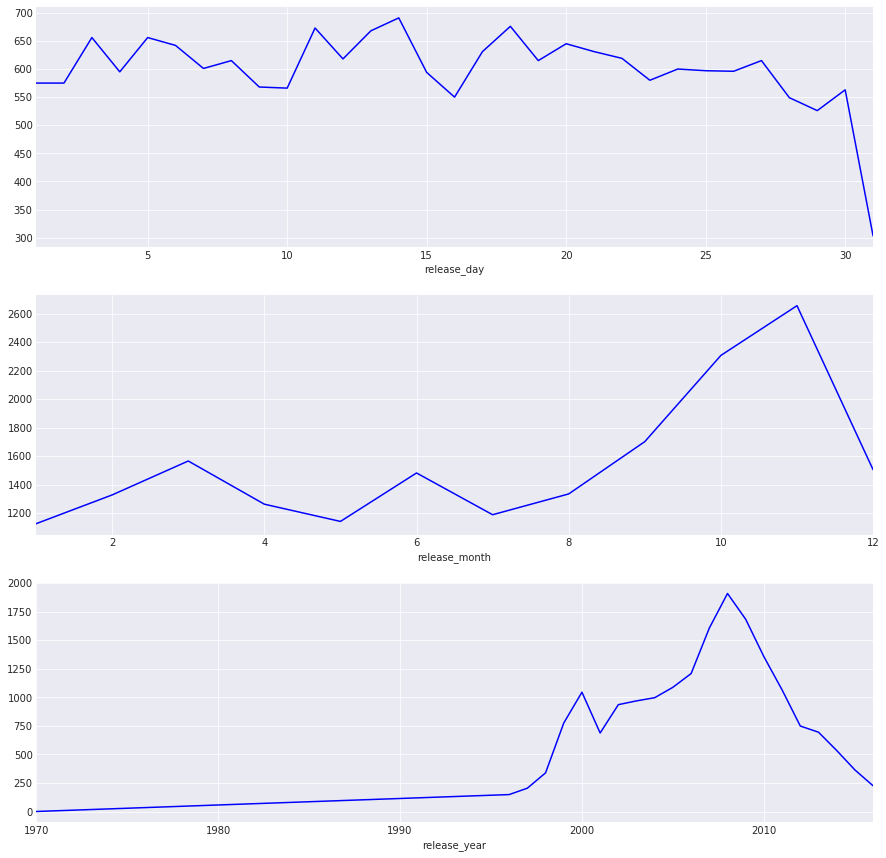

In [15]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(15, 15))
df.groupby(['release_day']).size().plot(ax=axis1, c='b')
df.groupby(['release_month']).size().plot(ax=axis2, c='b')
df.groupby(['release_year']).size().plot(ax=axis3, c='b')

Interesting! Apparently the hottest month for game releases is november! I guess it makes sense, since it's the month before the holidays, it's a pretty obvious business decision to sell games in november antecipating christmas. Also, it seems like the releases distribution for days of the month is pretty even, except for the last few days, where they drop off abruptly.

From the graph of releases by year we can see that the video game industry realy took off at the end of the 90's, probably boosted by the releases of the Nintendo 64 and Playstation in the mid 90's.

# Masterpieces

Let's take a look at the masterpieces in the last 40 years according to IGN.

In [16]:
masterpieces = df[df['score_phrase']=='Masterpiece']
masterpieces.drop('score_phrase', axis=1, inplace=True)
masterpieces

,title,platform,score,genre,editors_choice,release_year,release_month,release_day
1058,The Legend of Zelda: Ocarina of Time,Nintendo 64,10.0,Action,Y,1998,11,25
1287,Pokemon Blue Version,Others,10.0,RPG,Y,1999,6,23
1289,Pokemon Red Version,Others,10.0,RPG,Y,1999,6,23
1354,Joust,Others,10.0,Action,N,1999,7,6
1363,Shanghai,Others,10.0,Puzzle,N,1999,7,6
1408,Checkered Flag,Others,10.0,Racing,N,1999,7,6
1434,Super Mario Bros. Deluxe,Game Boy Color,10.0,Platformer,Y,1999,7,21
1457,Soulcalibur,Dreamcast,10.0,Fighting,Y,1999,9,20
1461,The Legend of Zelda: Link's Awakening DX,Game Boy Color,10.0,Action,Y,1999,9,17
1592,Mario Golf [Game Boy Color],Game Boy Color,10.0,Sports,Y,1999,10,5


## Masterpieces by Platform

In [17]:
masterpieces['platform'].value_counts()

Game Boy Color    10
PlayStation 3      9
Others             9
PC                 5
Xbox 360           5
PlayStation 4      5
Xbox One           4
Wii                4
Dreamcast          1
Nintendo 64        1
Wireless           1
iPhone             1
Name: platform, dtype: int64

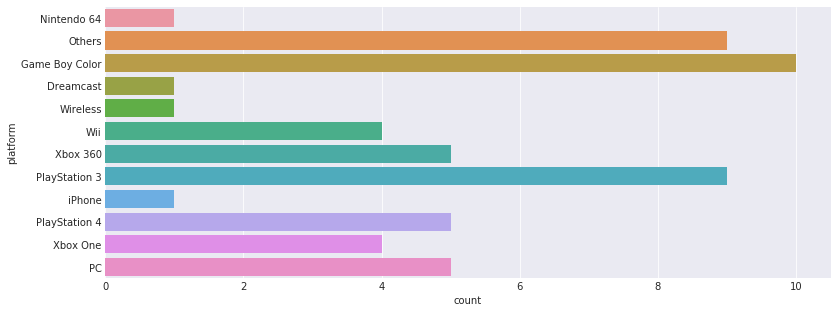

In [18]:
plt.figure(figsize=(13, 5))
sns.countplot(y='platform', data=masterpieces)

We can see that the platform with the most masterpieces is the Game Boy Color, followed by the Playstation 3 and Xbox 360. It's remarkable that the Game Boy Color has the most masterpieces, since it's not even in the top 10 for release count.

## Masterpieces by Year

Let's take a look at the masterpieces distribution by year

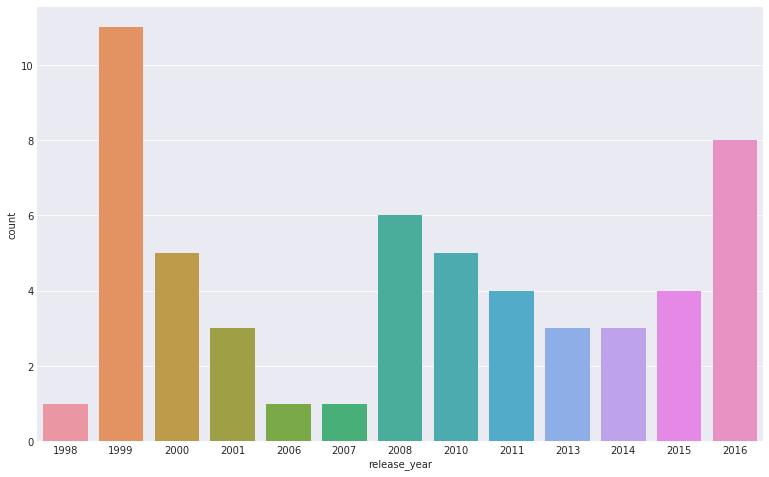

In [19]:
plt.figure(figsize=(13, 8))
sns.countplot('release_year', data=masterpieces)

# Worst Titles

![](http://)Since there are only 3 disasters, let's take a look at the bottom two scores, disasters/unberables.

In [20]:
disasters = df[df['score_phrase']=='Disaster']
unbearables = df[df['score_phrase']=='Unbearable']
worst = pd.concat([disasters, unbearables])
worst

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day
890,Disaster,Extreme PaintBrawl,PC,0.7,Action,N,1998,10,29
5242,Disaster,Looney Tunes: Back in Action: Zany Race,Wireless,0.5,Racing,N,2003,10,28
12513,Disaster,Action Girlz Racing,Wii,0.8,Racing,N,2009,2,11
439,Unbearable,Revolution X,PlayStation,1.0,Action,N,1996,11,25
496,Unbearable,Revolution X,PlayStation,1.0,Action,N,1996,11,25
574,Unbearable,The Crow: City of Angels,PlayStation,1.0,Action,N,1997,3,11
770,Unbearable,Fantastic Four,PlayStation,1.0,Action,N,1997,8,29
848,Unbearable,C: The Contra Adventure,PlayStation,1.0,Action,N,1998,9,16
978,Unbearable,Deep Sea Trophy Fishing,PC,1.8,Hunting,N,1998,9,28
1154,Unbearable,Rush Down,PlayStation,1.5,Sports,N,1999,3,9


## Worst Titles by Platform

In [21]:
worst['platform'].value_counts()

Wii                 18
PC                  16
PlayStation          9
Nintendo DS          7
PlayStation 2        5
Xbox                 4
Others               3
Wireless             3
Game Boy Advance     2
Xbox 360             2
Nintendo DSi         1
PlayStation 4        1
Dreamcast            1
iPhone               1
Nintendo 64          1
PlayStation 3        1
Name: platform, dtype: int64

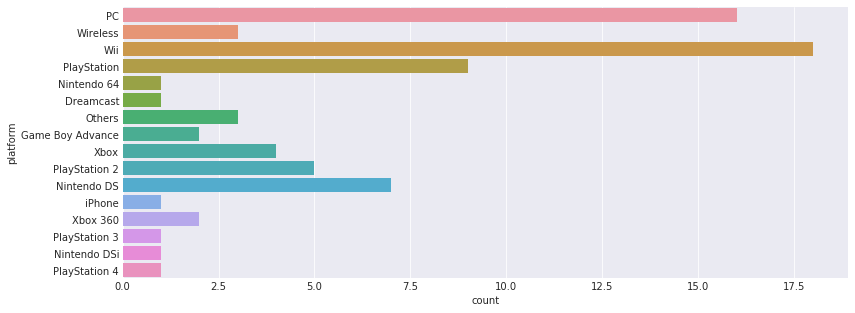

In [22]:
plt.figure(figsize=(13, 5))
sns.countplot(y='platform', data=worst)

Well.. things are looking pretty bad for the Wii. Having so many bad titles on the pc is expected, since it's the platform with the most releases, but the wii is only 4th in the titles released ranking.

#### Thank you all for taking a look at my notebook. This is for fun/learning purposes only. I'm a huge video games fan, so it's a really interesting project for me. Any suggestion, please leave them in the comments section of Kaggle. Thanks!